<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Face_Detect_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from google.colab import drive
drive.mount('/content/gdrive')

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

train_data = train.flow_from_directory('/content/gdrive/MyDrive/AI/Face_image/Trainning',
                                       target_size = (150,150),
                                       batch_size = 10,
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/gdrive/MyDrive/AI/Face_image/Validation',
                                       target_size = (150,150),
                                       batch_size = 10,
                                       class_mode = 'categorical')

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
Dropout(0.2)
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=5,batch_size=10,validation_data=validation_dataset,verbose=1)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 150 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/5
15/15 [==============================] - 89s 2s/step - loss: 1.2367 - accuracy: 0.7933 - val_loss: 0.4208 - val_accuracy: 0.8000
Epoch 2/5
15/15 [==============================] - 23s 2s/step - loss: 0.1142 - accuracy: 0.9400 - val_loss: 0.2118 - val_accuracy: 0.9000
Epoch 3/5
15/15 [==============================] - 23s 1s/step - loss: 5.3462e-04 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 0.9333
Epoch 4/5
15/15 [==============================] - 23s 1s/step - loss: 2.0204e-04 - accuracy: 1.0000 - val_loss: 0.1422 - val_accuracy: 0.9333
Epoch 5/5
15/15 [==============================] - 22s 1s/step - loss: 1.0178e-04 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9333


In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_55 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_57 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                

In [ ]:
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.08842358738183975
độ chính xác kiểm tra là:  0.9333333373069763


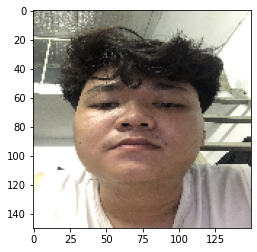

T.An


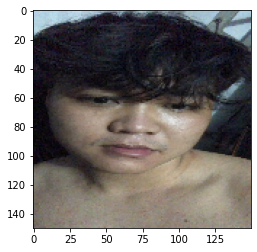

Phat


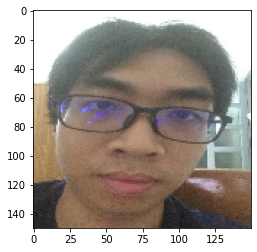

H.An


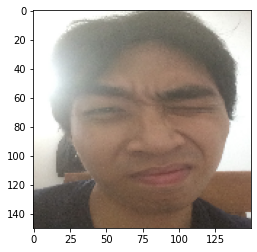

H.An


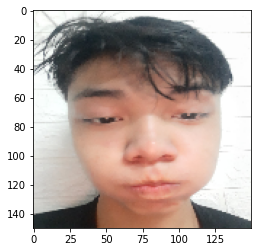

Phat


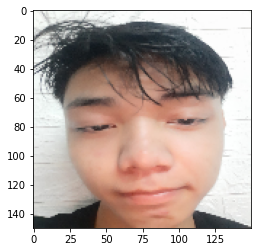

Phat


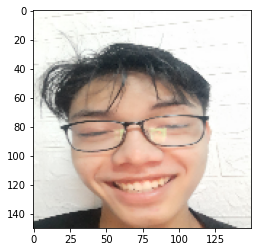

Phat


In [ ]:
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
dir = '/content/gdrive/MyDrive/AI/Face_image/Testing'
for i in os.listdir(dir):
  img = load_img(dir +'//'+ i, target_size=(150,150))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = img.reshape(1,150,150,3)
  image = img/255.0
  pred = np.argmax(model.predict(image))
  if pred == 0:
    print("H.An")
  if pred == 1:
    print("Phat")
  if pred == 2:
    print("T.An")

In [ ]:
model.save('/content/gdrive/MyDrive/AI/Face_Detect_CNN.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/Face_Detect_CNN.h5')

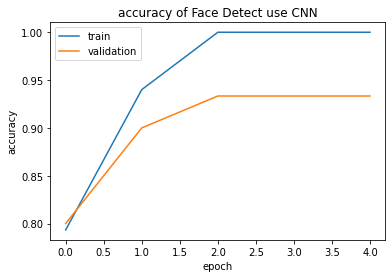

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of Face Detect use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()